In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df["customerID"].duplicated().sum()

0

In [11]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"]=df['SeniorCitizen'].apply(conv)

In [12]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


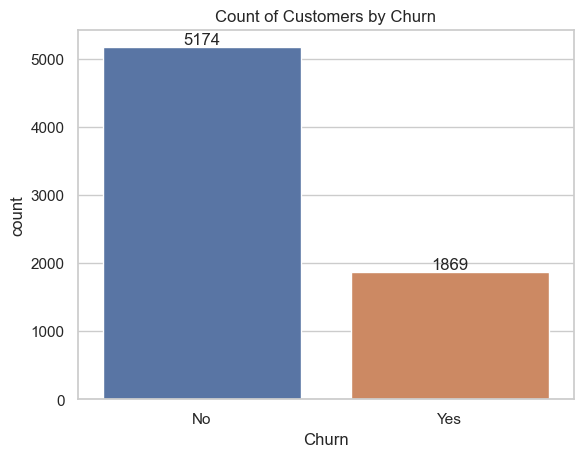

In [13]:
ax = sns.countplot(x= 'Churn' ,data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

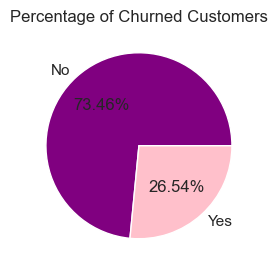

In [14]:
plt.figure(figsize=(3,4))
gb= df.groupby("Churn").agg({'Churn':"count"})
colors=['purple','pink']
plt.pie(gb['Churn'],labels = gb.index,autopct="%1.2f%%",colors=colors)
plt.title("Percentage of Churned Customers")
plt.show()

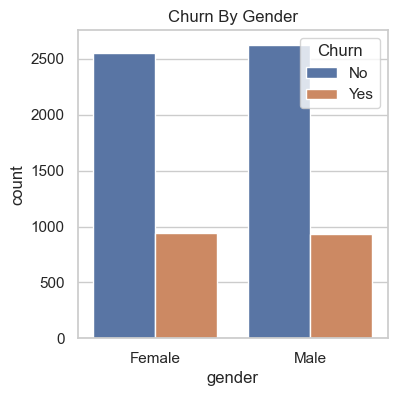

In [15]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender',data=df,hue="Churn")
plt.title("Churn By Gender")
plt.show()

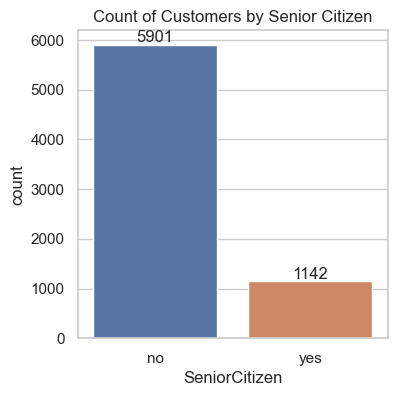

In [16]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

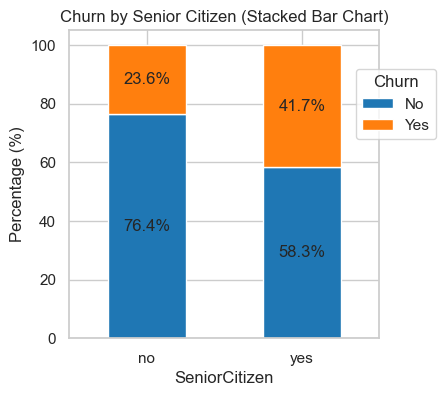

In [17]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

fig, ax = plt.subplots(figsize=(4, 4))  

total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  

plt.show()

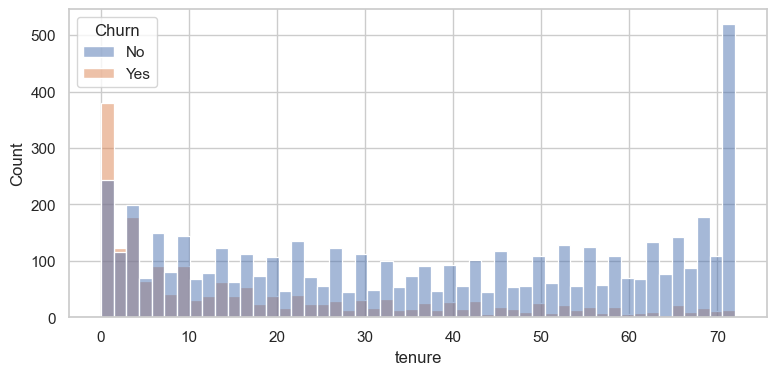

In [18]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=50,hue="Churn")
plt.show()

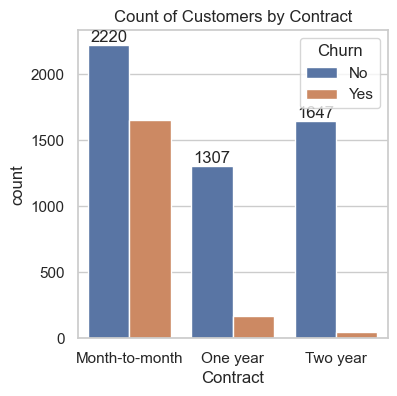

In [19]:


plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()



In [20]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

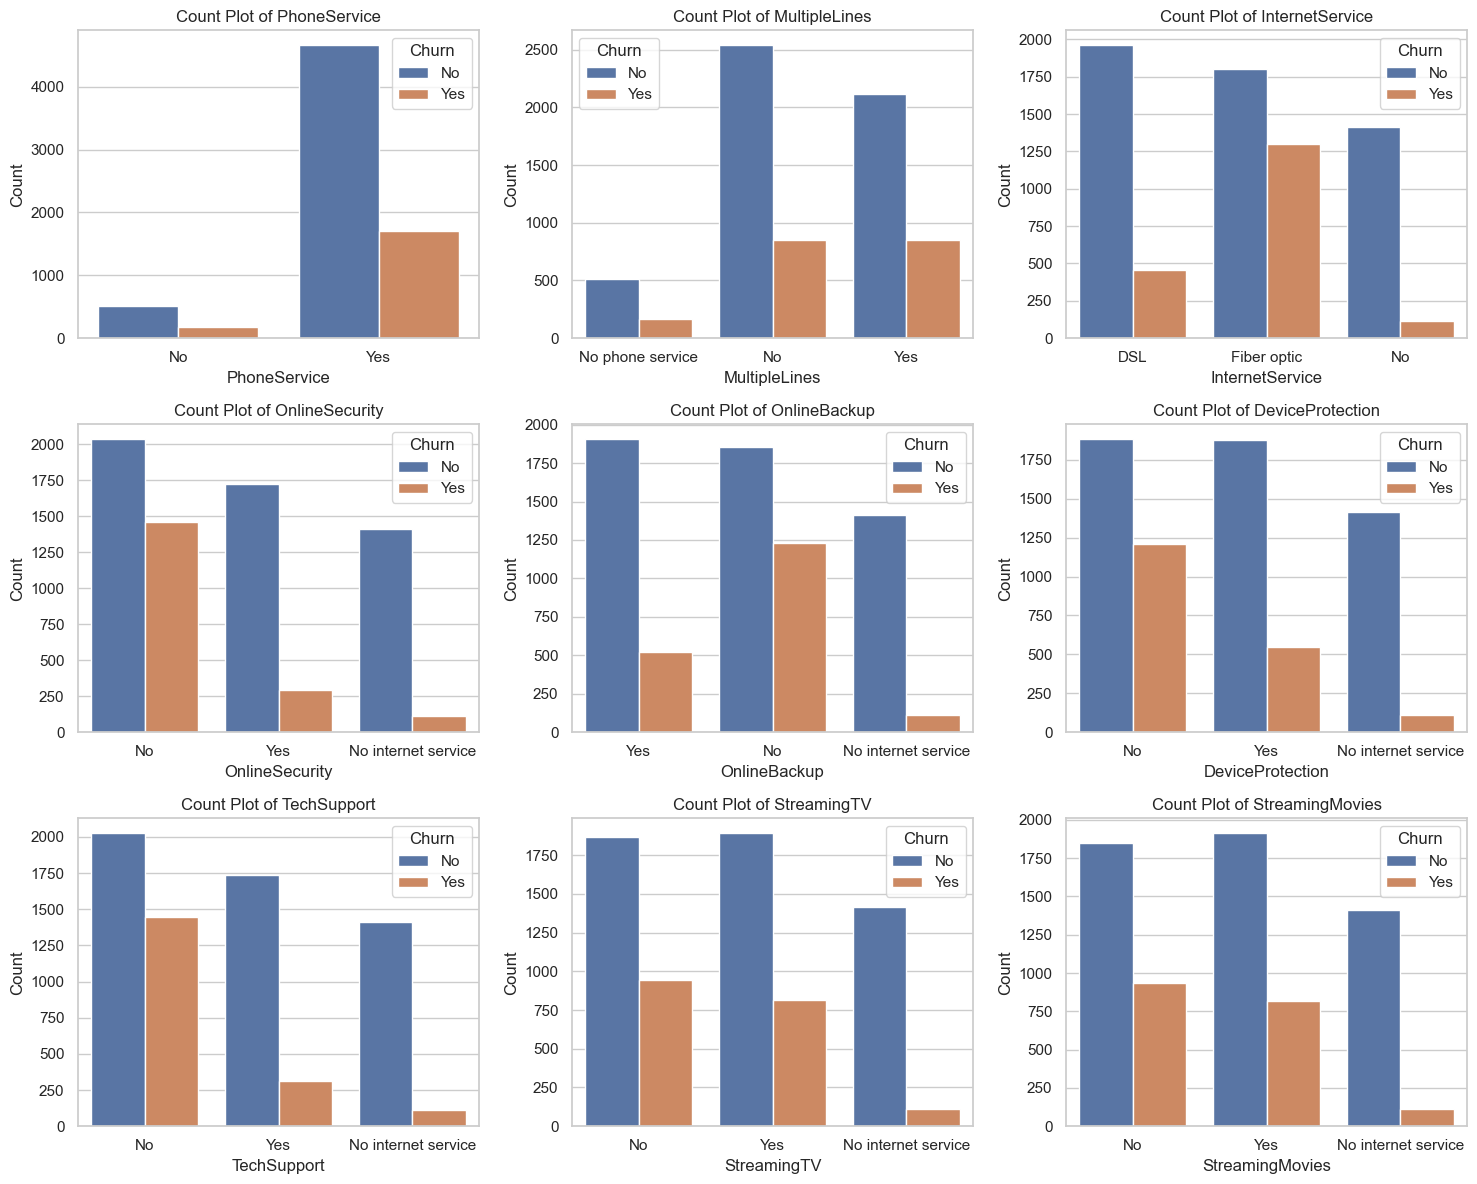

In [21]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

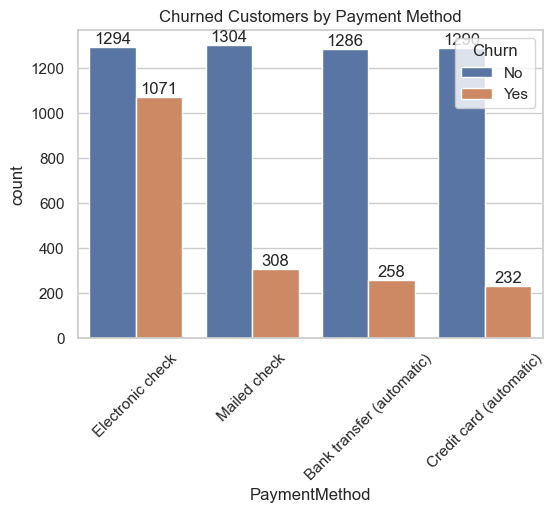

In [22]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

# Visualize Monthly Charges vs. Churn

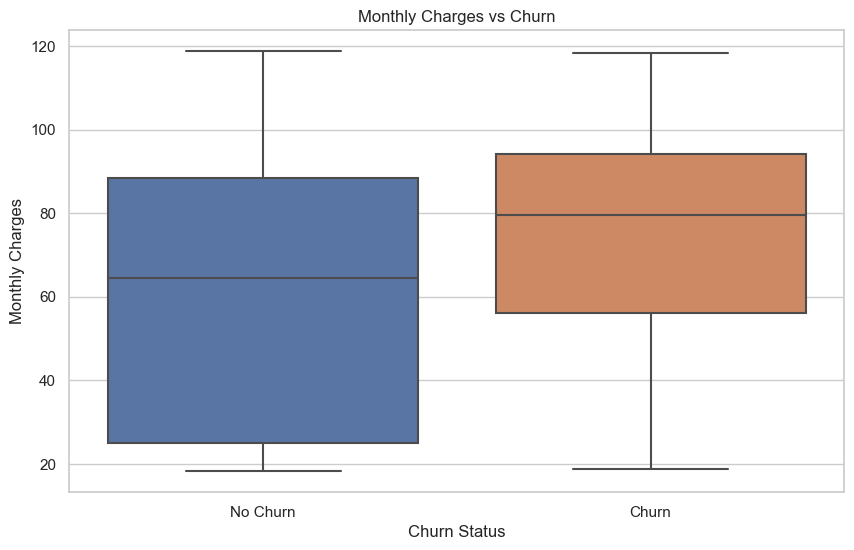

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a box plot for Monthly Charges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()


# Create a Correlation Heatmap

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


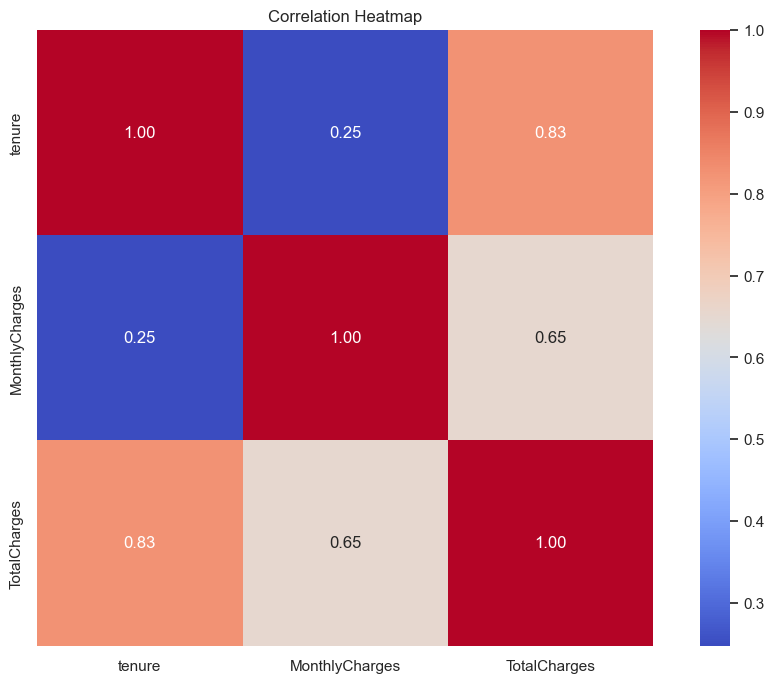

In [25]:
# Check the data types of each column
print(df.dtypes)

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


# Identify Strong Correlations

Let's find the pairs of variables with the highest absolute correlation values (excluding the correlation of variables with themselves, which is always 1).

In [26]:
# Get the absolute values of the correlation matrix
abs_corr = correlation_matrix.abs()

# Set the diagonal to NaN to exclude self-correlations
abs_corr.values[[np.arange(abs_corr.shape[0])]*2] = np.nan

# Find pairs of variables with the highest correlation
strong_corr_pairs = abs_corr.unstack().dropna().sort_values(ascending=False)

# Display the top 10 strongest correlations
print(strong_corr_pairs.head(10))


Series([], dtype: float64)


In [27]:
# Display the data types of each column
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [28]:
# Convert 'SeniorCitizen' and 'Churn' to categorical types
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['Churn'] = df['Churn'].astype('category')

# Verify the changes
print(df.dtypes)


customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [29]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN values in 'TotalCharges' after conversion
print(df['TotalCharges'].isna().sum())


0


In [30]:
# Get summary statistics for numeric columns
summary_statistics = df.describe()
print(summary_statistics)


            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


In [31]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


# Visualize Distribution of Numerical Variables

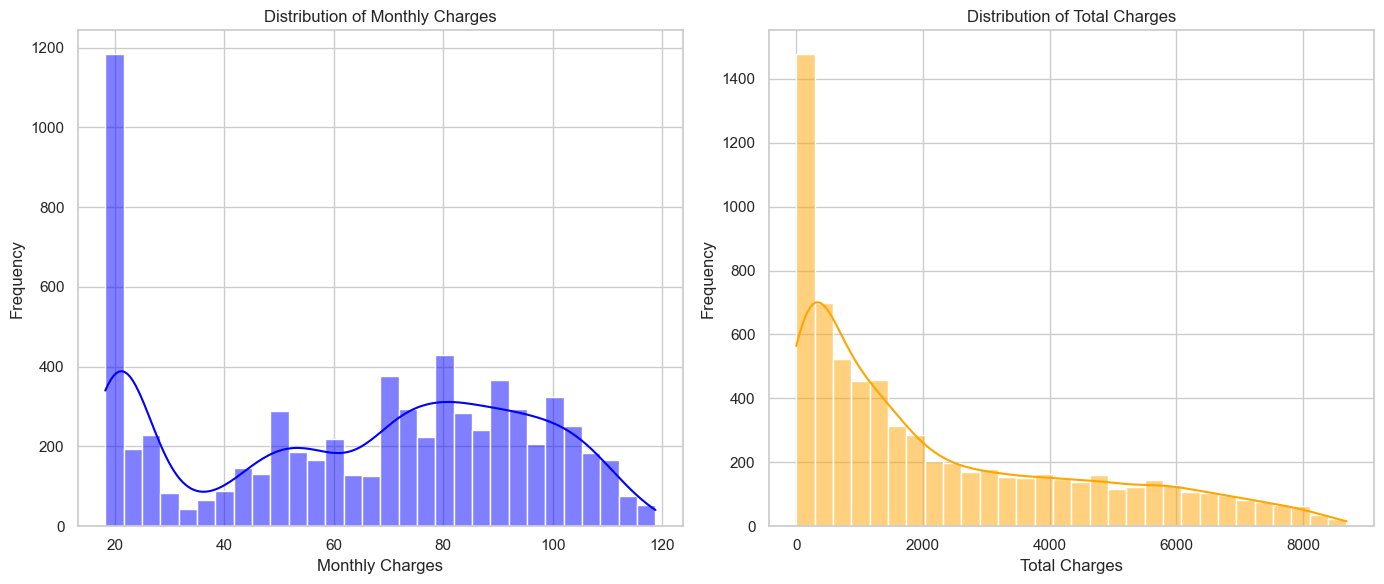

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style='whitegrid')

# Create histograms for MonthlyCharges and TotalCharges
plt.figure(figsize=(14, 6))

# MonthlyCharges histogram
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='blue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

# TotalCharges histogram
plt.subplot(1, 2, 2)
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Visualizing Categorical Variables
Count Plot for Churn

We can create a count plot to visualize the distribution of the Churn variable (i.e., whether customers have churned or not).

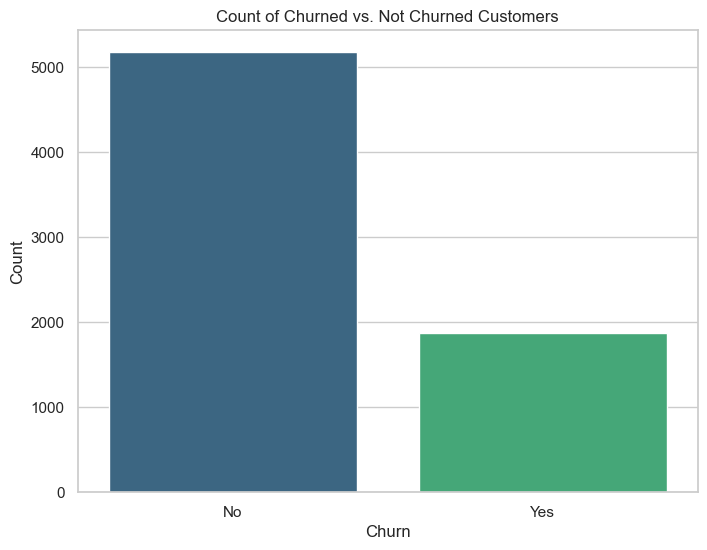

In [33]:
# Count plot for Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Count of Churned vs. Not Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Visualizing Other Categorical Variables

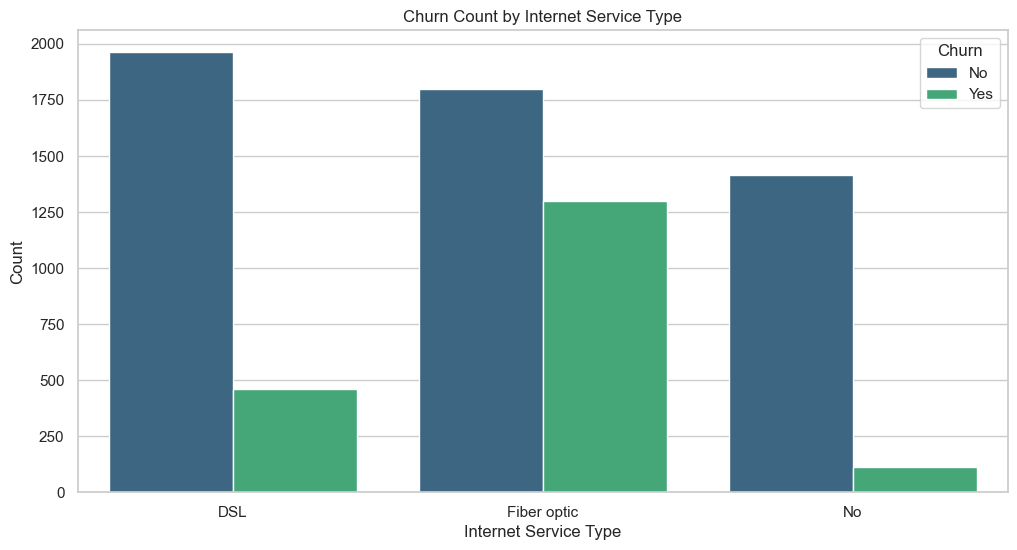

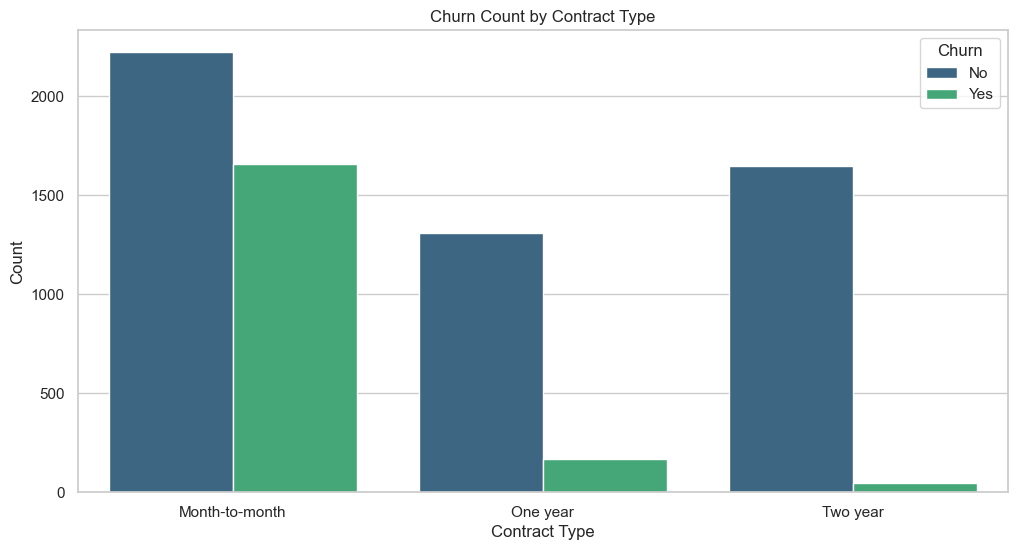

In [34]:
# Count plot for Churn vs InternetService
plt.figure(figsize=(12, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='viridis')
plt.title('Churn Count by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()

# Count plot for Churn vs Contract
plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')
plt.show()


# Analyzing Numerical Variables
Box Plot for Monthly Charges by Churn

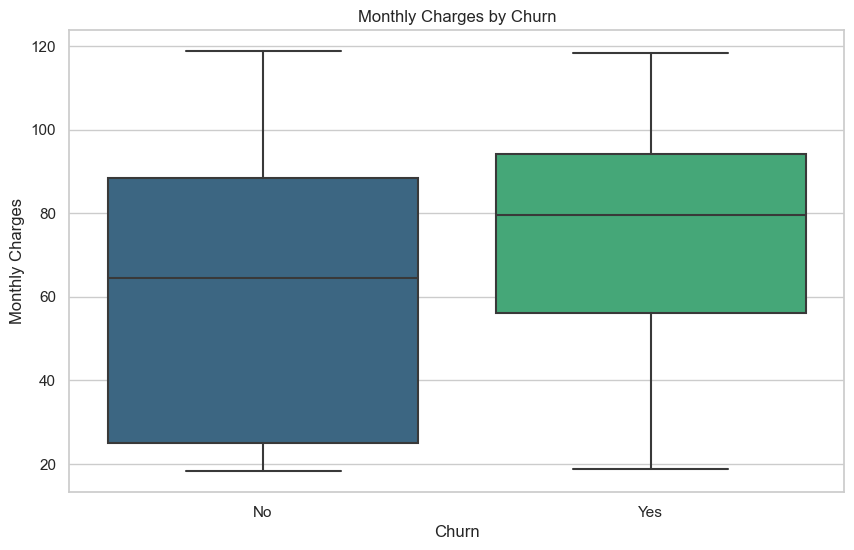

In [35]:
# Box plot for Monthly Charges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.xticks(rotation=0)
plt.show()


# Box Plot for Total Charges by Churn

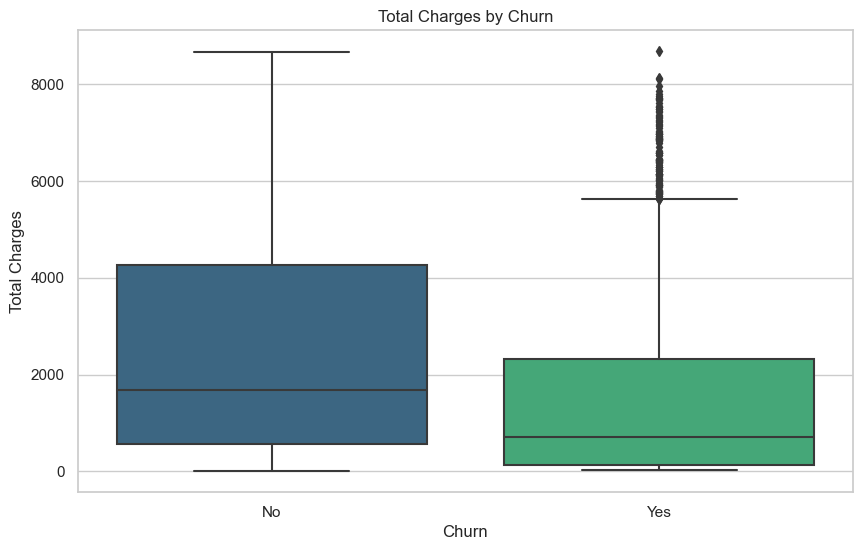

In [36]:
# Box plot for Total Charges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='viridis')
plt.title('Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.xticks(rotation=0)
plt.show()


In [38]:
from scipy.stats import chi2_contingency

# Chi-square test for gender and churn
contingency_table = pd.crosstab(df['gender'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')


Chi2: 0.4840828822091383, p-value: 0.48657873605618596


In [40]:
# Check for unique values in 'gender' and 'Churn'
print(df['gender'].unique())
print(df['Churn'].unique())

# Handle any unexpected values (if necessary)
df['gender'] = df['gender'].replace({'male': 'Male', 'female': 'Female'})
df['Churn'] = df['Churn'].replace({'Yes': 'Churn', 'No': 'No Churn'})


['Female' 'Male']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


In [41]:
# Check for null values in 'InternetService' and 'Churn'
print(df['InternetService'].isnull().sum())
print(df['Churn'].isnull().sum())

# Fill or drop NaN values if necessary
df.dropna(subset=['InternetService', 'Churn'], inplace=True)


0
0


In [42]:
# Check unique values in 'Contract' and 'Churn'
print(df['Contract'].unique())


['Month-to-month' 'One year' 'Two year']


In [43]:
# Ensure 'MonthlyCharges' is numeric
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Check for NaN values after conversion
print(df['MonthlyCharges'].isnull().sum())


0


In [44]:
# Ensure 'tenure' is numeric
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Check for NaN values after conversion
print(df['tenure'].isnull().sum())


0


# Analyzing the Influence of Internet Service on Churn

In [45]:
# Create a contingency table for Internet Service and Churn
contingency_table_internet = pd.crosstab(df['InternetService'], df['Churn'])

# Perform the Chi-Square test
chi2_internet, p_internet, dof_internet, expected_internet = chi2_contingency(contingency_table_internet)

# Print the results
print(f'Chi2: {chi2_internet}, p-value: {p_internet}')


Chi2: 732.309589667794, p-value: 9.571788222840544e-160


# Check Unique Values for Internet Service and Churn

In [46]:
# Check unique values
print(df['InternetService'].unique())
print(df['Churn'].unique())


['DSL' 'Fiber optic' 'No']
['No Churn', 'Churn']
Categories (2, object): ['No Churn', 'Churn']


# Check for Missing Values in Internet Service

In [47]:
# Check for null values in 'InternetService' and 'Churn'
print(df['InternetService'].isnull().sum())
print(df['Churn'].isnull().sum())


0
0


# Chi-Square Test for Contract Type and Churn

In [48]:
# Create a contingency table for Contract and Churn
contingency_table_contract = pd.crosstab(df['Contract'], df['Churn'])

# Perform the Chi-Square test
chi2_contract, p_contract, dof_contract, expected_contract = chi2_contingency(contingency_table_contract)

# Print the results
print(f'Chi2: {chi2_contract}, p-value: {p_contract}')


Chi2: 1184.5965720837926, p-value: 5.863038300673391e-258


# Check Unique Values for Contract and Churn

In [49]:
# Check unique values
print(df['Contract'].unique())
print(df['Churn'].unique())


['Month-to-month' 'One year' 'Two year']
['No Churn', 'Churn']
Categories (2, object): ['No Churn', 'Churn']


# Check for Missing Values in Contract and Churn

In [50]:
# Check for null values in 'Contract' and 'Churn'
print(df['Contract'].isnull().sum())
print(df['Churn'].isnull().sum())


0
0


# Data Preparation

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select features and target variable
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn'].map({'No Churn': 0, 'Churn': 1})  # Convert Churn to binary

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a column transformer with one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the features
X_processed = pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (5634, 46), Testing set size: (1409, 46)


# Train the Logistic Regression Model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.80
Confusion Matrix:
 [[926 109]
 [171 203]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



# Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = LogisticRegression(max_iter=1000)

# Define the hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Different solvers to try
}

# Setup GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_:.2f}')


Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.81


# Evaluate with Cross-Validation

In [54]:
from sklearn.model_selection import cross_val_score

# Cross-validate the logistic regression model
cross_val_scores = cross_val_score(model, X_processed, y, cv=5, scoring='accuracy')

print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Score: {cross_val_scores.mean():.2f}')


Cross-Validation Scores: [0.80411639 0.80979418 0.78992193 0.81107955 0.80610795]
Mean Cross-Validation Score: 0.80


# Feature Importance

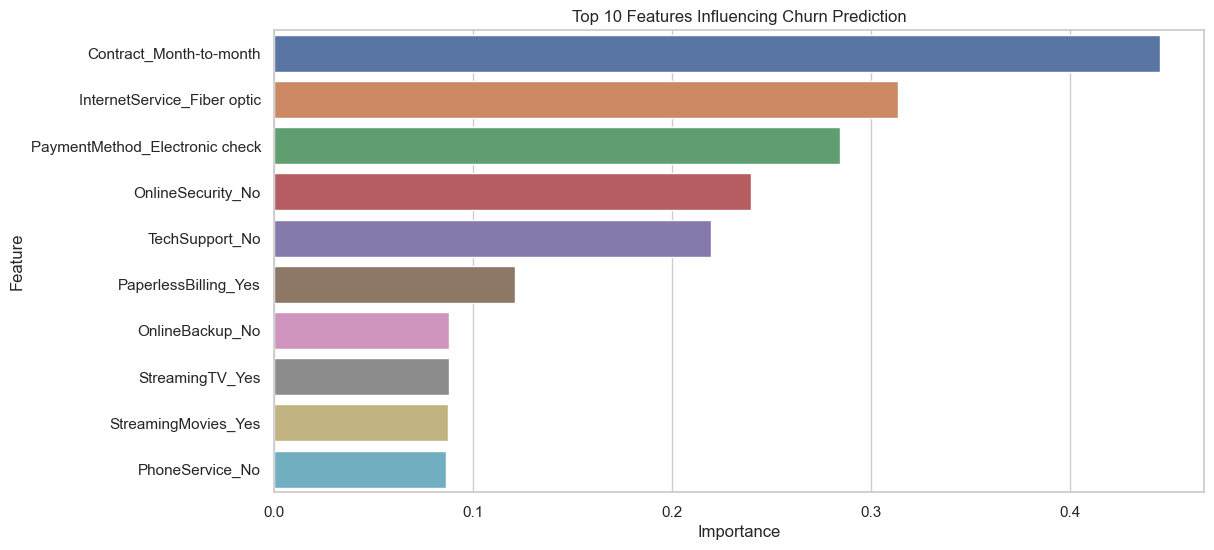

In [55]:
import numpy as np
import pandas as pd

# Fit the model on the full training set
model.fit(X_train, y_train)

# Get feature names from the one-hot encoder
feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)

# Combine with remaining numerical columns
all_feature_names = np.concatenate([feature_names, X.columns[~X.columns.isin(categorical_cols)]])

# Get coefficients
importance = model.coef_[0]

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Features Influencing Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
